In [ ]:
import torch

class SGD:
    def __init__(self, params, lr=0.01):
        # PyTorch의 SGD 옵티마이저를 사용
        self.optimizer = torch.optim.SGD(params, lr=lr)

    def update(self):
        # 파라미터 업데이트
        self.optimizer.step()


In [2]:
import torch

class Momentum:
    def __init__(self, params, lr=0.01, momentum=0.9):
        # PyTorch의 SGD 옵티마이저를 사용하고, momentum을 설정
        self.optimizer = torch.optim.SGD(params, lr=lr, momentum=momentum)

    def update(self):
        # 파라미터 업데이트
        self.optimizer.step()


In [3]:
import torch

class Adagrad:
    def __init__(self, params, lr=0.01, epsilon=1e-8):
        # PyTorch의 Adagrad 옵티마이저 사용
        self.optimizer = torch.optim.Adagrad(params, lr=lr, eps=epsilon)

    def update(self):
        # 파라미터 업데이트
        self.optimizer.step()


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = torch.randn(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = torch.randn(node_num, node_num) * 1
    a = torch.matmul(x, w)
    z = sigmoid(a)
    activations[i] = z

C:\Users\tkdwn\AppData\Local\Temp\ipykernel_12568\1065624675.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return 1 / (1 + np.exp(-x))


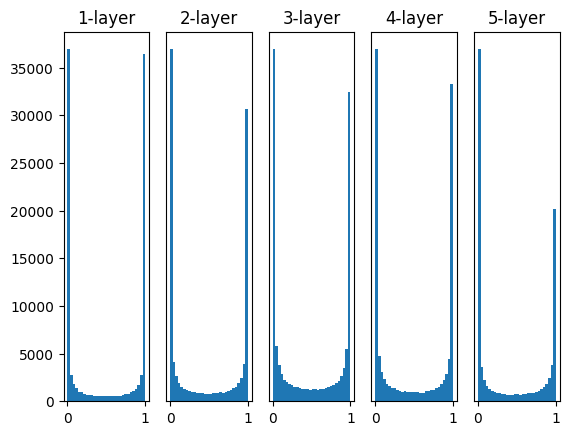

In [6]:
for i, a in activations.items():
    plt.subplot(1, hidden_layer_size, i+1)
    plt.title(str(i+1) + "-layer")
    if i!= 0:
        plt.yticks([])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = torch.randn(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = torch.randn(node_num, node_num) * 0.1
    a = torch.matmul(x, w)
    z = sigmoid(a)
    activations[i] = z

C:\Users\tkdwn\AppData\Local\Temp\ipykernel_12568\4047765756.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return 1 / (1 + np.exp(-x))


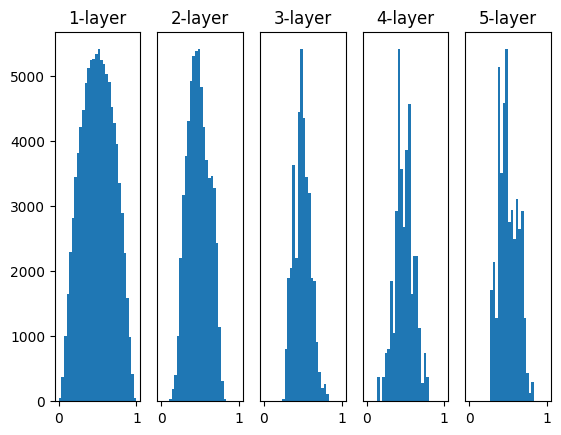

In [8]:
for i, a in activations.items():
    plt.subplot(1, hidden_layer_size, i+1)
    plt.title(str(i+1) + "-layer")
    if i!= 0:
        plt.yticks([])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = torch.randn(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]
    w = torch.randn(node_num, node_num) / np.sqrt(node_num)
    a = torch.matmul(x, w)
    z = sigmoid(a)
    activations[i] = z

C:\Users\tkdwn\AppData\Local\Temp\ipykernel_12568\1520530515.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return 1 / (1 + np.exp(-x))


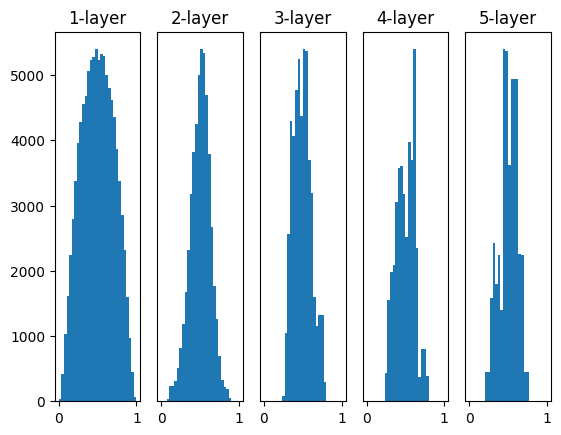

In [10]:
for i, a in activations.items():
    plt.subplot(1, hidden_layer_size, i+1)
    plt.title(str(i+1) + "-layer")
    if i!= 0:
        plt.yticks([])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet

# 데이터 로드
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
x_train = torch.Tensor(x_train[:300])  # Tensor로 변환
t_train = torch.Tensor(t_train[:300])  # Tensor로 변환
x_test = torch.Tensor(x_test)
t_test = torch.Tensor(t_test)

# 모델 정의
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)

# 옵티마이저 정의 (기존 SGD 클래스 대신 PyTorch의 내장 SGD 사용)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size // batch_size, 1)  # 배치 단위로 반복 횟수 계산
epoch_cnt = 0

# 학습 루프
for epoch in range(max_epochs):  # epoch마다 반복
    for i in range(0, train_size, batch_size):  # 배치 처리
        # 배치 선택
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        # 기울기 계산 (기존 gradient 함수 호출)
        grads = network.gradient(x_batch, t_batch)

        # 가중치 업데이트
        optimizer.zero_grad()  # 기울기 초기화
        network.params()  # 파라미터 가져오기
        for param, grad in zip(network.params().values(), grads.values()):
            param.grad = grad  # 기울기 설정
        optimizer.step()  # 가중치 업데이트

    # epoch마다 정확도 계산
    if epoch % iter_per_epoch == 0:
        # t_batch는 원-핫 인코딩이므로 argmax로 변환하여 사용
        t_train_idx = torch.argmax(t_train, dim=1)
        t_test_idx = torch.argmax(t_test, dim=1)
        
        train_acc = network.accuracy(x_train, t_train_idx)
        test_acc = network.accuracy(x_test, t_test_idx)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print(f"epoch: {epoch_cnt}, train acc: {train_acc}, test acc: {test_acc}")

        epoch_cnt += 1
        
    # max_epochs에 도달하면 종료
    if epoch_cnt >= max_epochs:
        break


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [17]:
import torch
import torch.nn as nn

class Dropout(nn.Module):
    def __init__(self, dropout_ratio=0.5):
        super(Dropout, self).__init__()
        self.dropout = nn.Dropout(dropout_ratio)

    def forward(self, x, train_flg=True):
        if train_flg:
            return self.dropout(x)  # 학습 중에는 dropout 적용
        else:
            return x  # 평가 시에는 dropout을 적용하지 않음


In [18]:
from common.util import shuffle_dataset

(x_train, t_train), (x_test, t_test) = load_mnist()

x_train, t_train = shuffle_dataset(x_train, t_train)

validation_rate = 0.2
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

In [19]:
import numpy as np

weight_decay = 10 ** np.random.uniform(-8, -4)
lr = 10 ** np.random.uniform(-6, -2)